# Decision Tree

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv("D:\Machine learning\decision tree\car_evaluation.csv")

In [73]:
df.shape

(1727, 7)

In [74]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [75]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [76]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [78]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    
    print(df[col].value_counts()) 

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64
5more    432
4        432
3        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [79]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [80]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
le = LabelEncoder()

In [92]:
df['buying']= le.fit_transform(df['buying'])
df['maint']= le.fit_transform(df['maint'])
df['lug_boot']= le.fit_transform(df['lug_boot'])
df['safety']= le.fit_transform(df['safety'])
df['class'] = le.fit_transform(df['class'])
df['persons']= le.fit_transform(df['persons'])
df['doors'] = le.fit_transform(df['doors'])

In [93]:
X = df.drop(['class'], axis=1)
y = df['class']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [95]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [96]:
X_train.dtypes

buying      int64
maint       int64
doors       int32
persons     int32
lug_boot    int64
safety      int64
dtype: object

In [97]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int64
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int64
 5   safety    1727 non-null   int64
 6   class     1727 non-null   int64
dtypes: int32(2), int64(5)
memory usage: 81.1 KB


In [99]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


In [101]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,0,1
932,2,3,2,1,0,1
628,0,0,3,0,0,0
1497,1,0,3,1,1,2
1262,2,1,2,2,1,1


In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [105]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [106]:
y_pred_gini = clf_gini.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7965


In [108]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 0, 0, ..., 2, 2, 0], dtype=int64)

In [109]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7718


In [110]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(83.7, 54.360000000000014, 'gini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.499\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\ngini = 0.438\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.598\nsamples = 268\nvalue = [119, 32, 117, 0]')]

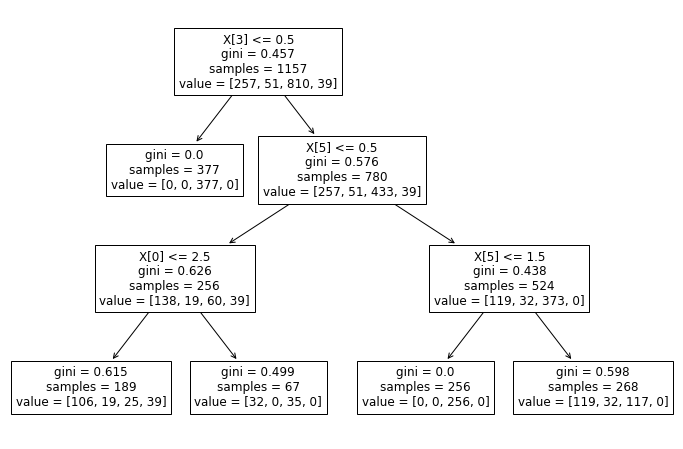

In [111]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [113]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [114]:
y_pred_en = clf_en.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7965


In [116]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([2, 0, 0, ..., 2, 2, 0], dtype=int64)

In [117]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7718


In [118]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.999\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\nentropy = 1.081\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.408\nsamples = 268\nvalue = [119, 32, 117, 0]')]

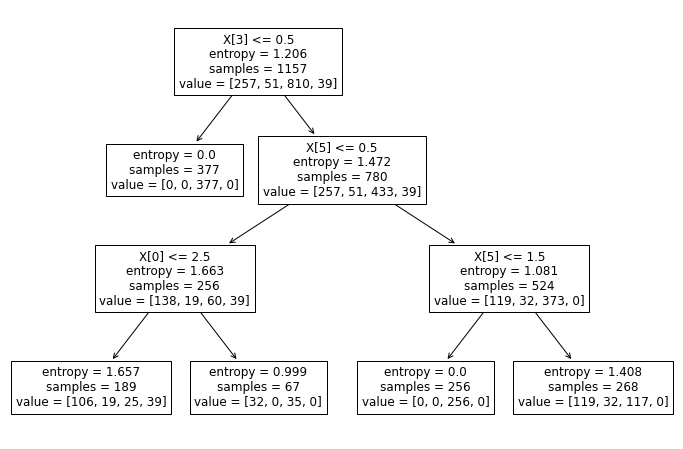

In [119]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[113   0  14   0]
 [ 18   0   0   0]
 [ 58   0 341   0]
 [ 26   0   0   0]]


In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.53      0.89      0.66       127
           1       0.00      0.00      0.00        18
           2       0.96      0.85      0.90       399
           3       0.00      0.00      0.00        26

    accuracy                           0.80       570
   macro avg       0.37      0.44      0.39       570
weighted avg       0.79      0.80      0.78       570



C:\Users\ANKIT KUMAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
